In [1]:
# Import Numpy for calculations and matplotlib for charting
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from scipy import stats

In [11]:

# Read our data file the pandas library
file_path = Path("../Predictions/Virginia_predictions_results.csv")
data = pd.read_csv(file_path)

file_path2 = Path("../Predictions/proj_4_feat_target_var_set.csv")
data2 = pd.read_csv(file_path2)

# Display sample data

data2

,fips_code,state_id,state_name,high_tourist_border_sales,year,niaaa_pop_21_plus,census_total_pop,census_total_pop_21_plus,census_percent_pop_21_plus,census_percent_pop_18_24,...,bea_personal_income_dollars,bea_disp_inc_dollars,bea_percapita_personal_income_dollars,bea_percapita_disp_inc_dollars,census_median_household_inc_dollars,census_percent_pop_in_poverty_est,niaaa_total_beer_vol_consumed_gallons,niaaa_legal_adult_per_capita_beer_consumed_gallons,ba_craft_beer_produced_gallons,ba_legal_adult_per_capita_craft_beer_produced_gallons
0,1,AL,Alabama,0,2010,3439923,4785298,3426273,0.716,0.102,...,162068.8,148862.1,33849,31091,40474,0.172,101835000,29.60,NaN,NaN
1,2,AK,Alaska,1,2010,494781,713985,494078,0.692,0.105,...,35374.3,32703.9,49543,45803,64576,0.125,15476350,31.28,NaN,NaN
2,4,AZ,Arizona,0,2010,4496526,6413737,4502443,0.702,0.099,...,216223.6,198815.2,33774,31055,46789,0.188,140015325,31.14,NaN,NaN
3,5,AR,Arkansas,0,2010,2082760,2921606,2074340,0.710,0.100,...,94127.0,86387.0,32218,29569,38307,0.153,53429000,25.65,NaN,NaN
4,6,CA,California,0,2010,26311028,37349363,26293952,0.704,0.106,...,1609997.5,1431825.6,43138,38364,57708,0.163,651673303,24.77,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,51,VA,Virginia,0,2021,6412892,8642274,6395283,0.740,0.095,...,578639.7,499639.6,66838,57713,80963,0.098,151097751,23.56,14074350.0,2.19
608,53,WA,Washington,0,2021,5795889,7738692,5788542,0.748,0.086,...,574266.8,505590.1,74188,65315,84247,0.077,125364000,21.63,17599728.0,3.04
609,54,WV,West Virginia,0,2021,1358876,1782959,1351483,0.758,0.088,...,87617.4,79840.2,49071,44715,51248,0.169,38037000,27.99,733894.0,0.54
610,55,WI,Wisconsin,0,2021,4383656,5895908,4380660,0.743,0.092,...,355048.0,314662.1,60381,53513,67125,0.093,135005000,30.80,30531485.0,6.96


In [12]:
fips = 51
condition = data2['fips_code'] == fips
data2 = data2[condition]
data2

,fips_code,state_id,state_name,high_tourist_border_sales,year,niaaa_pop_21_plus,census_total_pop,census_total_pop_21_plus,census_percent_pop_21_plus,census_percent_pop_18_24,...,bea_personal_income_dollars,bea_disp_inc_dollars,bea_percapita_personal_income_dollars,bea_percapita_disp_inc_dollars,census_median_household_inc_dollars,census_percent_pop_in_poverty_est,niaaa_total_beer_vol_consumed_gallons,niaaa_legal_adult_per_capita_beer_consumed_gallons,ba_craft_beer_produced_gallons,ba_legal_adult_per_capita_craft_beer_produced_gallons
46,51,VA,Virginia,0,2010,5820350,8024617,5793773,0.7220,0.1010,...,364677.9,325496.5,45443,40560,60674,0.107,158652676,27.26,NaN,NaN
97,51,VA,Virginia,0,2011,5896099,8096604,5878135,0.7260,0.1020,...,385635.1,340027.0,47564,41939,61882,0.114,155767837,26.42,1904640.0,0.32
148,51,VA,Virginia,0,2012,5976825,8185867,5967497,0.7290,0.1010,...,402072.1,356231.8,49052,43459,61741,0.106,156149736,26.13,2605829.0,0.44
199,51,VA,Virginia,0,2013,6045816,8260405,6038356,0.7310,0.1010,...,398579.8,348961.5,48198,42198,62666,0.104,153901939,25.46,4002182.0,0.66
250,51,VA,Virginia,0,2014,6108133,8326289,6094844,0.7320,0.1000,...,414710.1,362726.7,49764,43526,64902,0.102,153586252,25.14,6074656.0,0.99
301,51,VA,Virginia,0,2015,6161212,8382993,6153117,0.7340,0.0990,...,433088.2,376673.5,51620,44896,66262,0.109,154177939,25.02,8497441.0,1.38
352,51,VA,Virginia,0,2016,6210094,8411808,6182679,0.7350,0.0980,...,444691.4,386860.4,52659,45811,68114,0.114,154230673,24.84,7986983.0,1.29
403,51,VA,Virginia,0,2017,6261573,8470020,6242405,0.7370,0.0970,...,462372.2,402867.4,54380,47382,71535,0.103,150304209,24.00,11125999.0,1.78
454,51,VA,Virginia,0,2018,6301045,8517685,6277534,0.7370,0.0970,...,479766.6,419465.7,56133,49077,72577,0.098,148338545,23.54,9690398.0,1.54
505,51,VA,Virginia,0,2019,6345736,8535519,6316284,0.7400,0.0940,...,501811.6,436536.8,58368,50776,76456,0.088,149584511,23.57,10923061.0,1.72


In [13]:
sample_data = data['Predicted_Value']

# Calculate sample statistics
sample_mean = sample_data.mean()
sample_std = sample_data.std()
sample_size = len(sample_data)

# Choose confidence level
confidence_level = 0.95

# Calculate critical value
critical_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

# Calulate standard error
standard_error = sample_std / (sample_size ** 0.5)

# Calculate margin of error
margin_of_error = critical_value * standard_error

# Calculate lower and upper bounds
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Add lower and upper bounds to a new column in the DataFrame

data['Lower Bound'] = lower_bound
data['Upper Bound'] = upper_bound

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
data.head()

Lower Bound: 28.91621800531745
Upper Bound: 30.371703064744022


,Percentage,Predicted_Value,Lower Bound,Upper Bound
0,0.01,21.186022,28.916218,30.371703
1,0.02,21.186022,28.916218,30.371703
2,0.03,21.186022,28.916218,30.371703
3,0.04,21.186022,28.916218,30.371703
4,0.05,21.369901,28.916218,30.371703


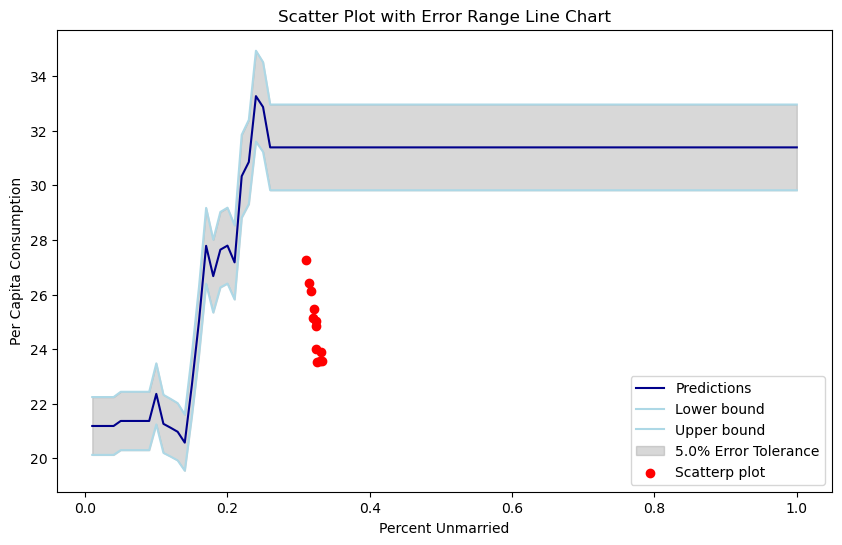

In [19]:
# Extract columns for X-axis, Y-axis, and error range bounds
x_values = data['Percentage']  # Replace 'X-axis' with the actual column name for X-axis data
y_values = data['Predicted_Value']  # Replace 'Y-axis' with the actual column name for Y-axis data

tolerance = 0.05
lowerY = data['Predicted_Value'] * (1 - tolerance)
upperY = data['Predicted_Value'] * (1 + tolerance)

# Plot the error range with the line graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Predictions', color = 'darkblue')
plt.plot(x_values, lowerY, label='Lower bound', color = 'lightblue')
plt.plot(x_values, upperY, label='Upper bound', color = 'lightblue')
plt.fill_between(x_values, lowerY, upperY, color='gray', alpha=0.3, label=f'{tolerance*100}% Error Tolerance')

scatterX = data2['census_percent_pop_never_married']
scatterY = data2['niaaa_legal_adult_per_capita_beer_consumed_gallons']

plt.scatter(scatterX, scatterY, label='Scatterp plot', color='red')

# Customize labels and title
plt.xlabel('Percent Unmarried')
plt.ylabel('Per Capita Consumption')
plt.title('Scatter Plot with Error Range Line Chart')
plt.legend()

# Show the plot
#plt.grid(True)
plt.show()